In [1]:
from pathlib import Path
import glob
import geopandas as gpd
from utils import *

### Location where data is stored

In [2]:
DATA_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/tiffs/")
SHAPEFILE_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/shps/ROI_small")

ANWR_DIR = DATA_DIR / "anwr"
IVOTUK_NORTH_DIR = DATA_DIR / "ivotuk_north"
IVOTUK_SOUTH_DIR = DATA_DIR / "ivotuk_south"
PRUDHOEBAY_DIR = DATA_DIR / "prudhoebay"
ANWR_SHAPEFILE_DIR = SHAPEFILE_DIR / "ANWR_small.shp"
IVOTUK_NORTH_SHAPEFILE_DIR = SHAPEFILE_DIR / "Ivotuk_north_small.shp"
IVOTUK_SOUTH_SHAPEFILE_DIR = SHAPEFILE_DIR / "Ivotuk_south_small.shp"
PRUDHOEBAY_SHAPEFILE_DIR = SHAPEFILE_DIR / "PrudhoeBay_small.shp"

### Read all files, sort, and make_dictionary

In [3]:
anwr_files = glob.glob(str(ANWR_DIR / "*"))
ivotuk_north_files = glob.glob(str(IVOTUK_NORTH_DIR / "*"))
ivotuk_south_files = glob.glob(str(IVOTUK_SOUTH_DIR / "*"))
prudhoebay_files = glob.glob(str(PRUDHOEBAY_DIR / "*"))
anwr_files.sort()
prudhoebay_files.sort()
ivotuk_north_files.sort()
ivotuk_south_files.sort()
files = {"anwr": anwr_files,
        "ivotuk_north": ivotuk_north_files,
        "ivotuk_south": ivotuk_south_files,
        "prudhoebay": prudhoebay_files}
anwr_label_file = gpd.read_file(ANWR_SHAPEFILE_DIR)
ivotuk_north_label_file = gpd.read_file(IVOTUK_NORTH_SHAPEFILE_DIR)
ivotuk_south_label_file = gpd.read_file(IVOTUK_SOUTH_SHAPEFILE_DIR)
prudhoebay_label_file = gpd.read_file(PRUDHOEBAY_SHAPEFILE_DIR)
labels = {"anwr": anwr_label_file,
        "ivotuk_north": ivotuk_north_label_file,
        "ivotuk_south": ivotuk_south_label_file,
        "prudhoebay": prudhoebay_label_file}

### Print file Statistics

In [4]:
print_files_stats(files)


***Printing stats for anwr***

Total number of available files: 494
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_02_18.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2021_07_28.tif

***Printing stats for ivotuk_north***

Total number of available files: 494
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_02_18.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2021_07_28.tif

***Printing stats for ivotuk_south***

Total number of available files: 494
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2000_02_18.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2021_07_28.tif

***Printing stats for prudhoebay***

Total number of available files: 494
First file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2000_02_18.tif
Last file: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2021_07_28.tif


### Number of files per year/month

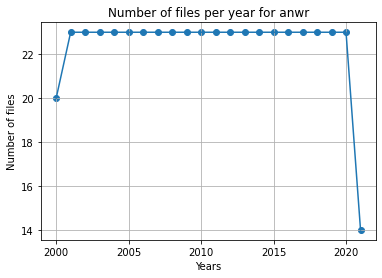

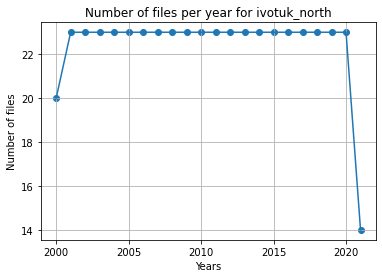

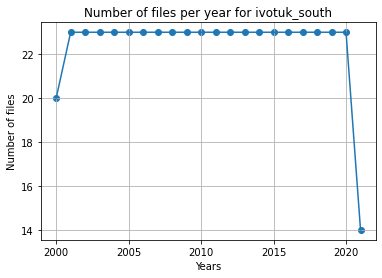

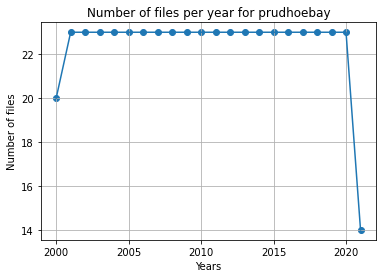

In [5]:
bar_files_by(files, "year")

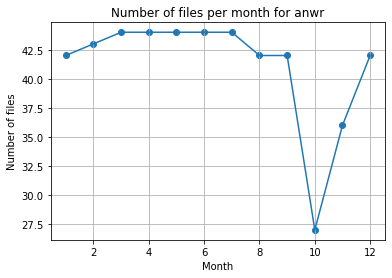

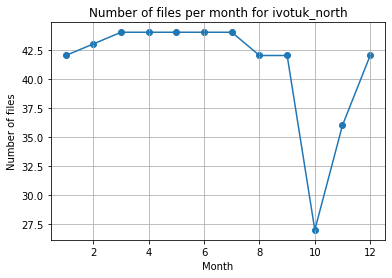

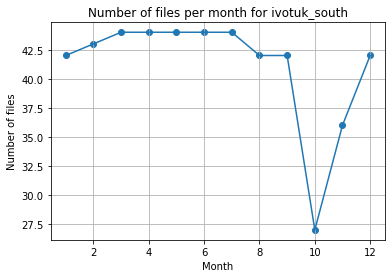

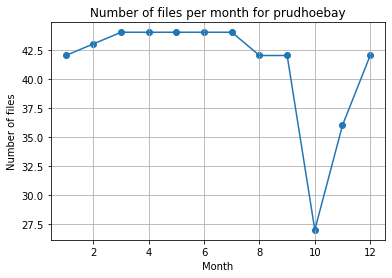

In [6]:
bar_files_by(files, "month")

In [7]:
masks = {"anwr": get_mask(rasterio.open(files['anwr'][0]), labels['anwr']),
        "ivotuk_north": get_mask(rasterio.open(files['ivotuk_north'][0]), labels['ivotuk_north']),
        "ivotuk_south": get_mask(rasterio.open(files['ivotuk_south'][0]), labels['ivotuk_south']),
        "prudhoebay": get_mask(rasterio.open(files['prudhoebay'][0]), labels['prudhoebay'])}

/home/aryal007/anaconda3/envs/py36/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


### ANWR NDVI Sample

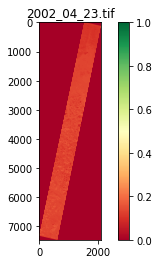

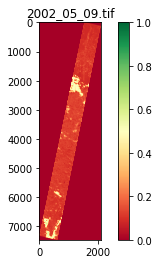

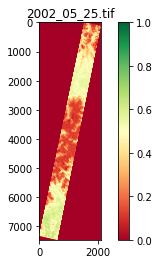

In [8]:
for i in range(50,53):
    vis_tiff(files['anwr'][i], masks['anwr'], vmax=1, vflip=True)

### ivotuk NDVI sample

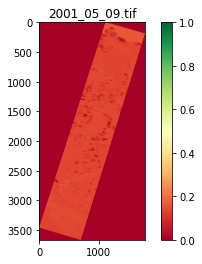

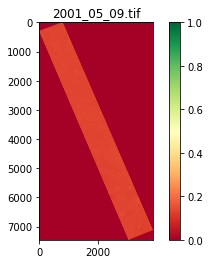

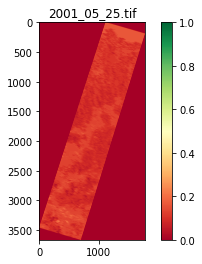

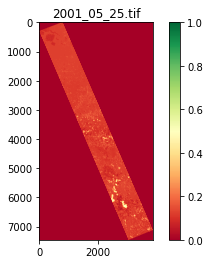

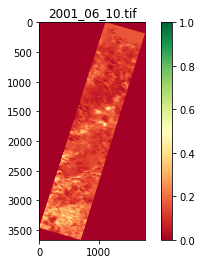

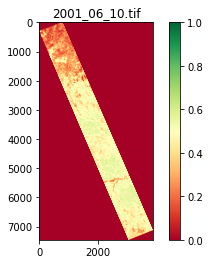

In [9]:
for i in range(28,31):
    vis_tiff(files['ivotuk_north'][i], masks['ivotuk_north'], vmax=1, vflip=True)
    vis_tiff(files['ivotuk_south'][i], masks['ivotuk_south'], vmax=1, vflip=True)

### prudhoebay NDVI samples

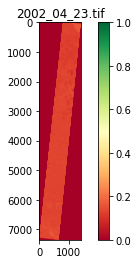

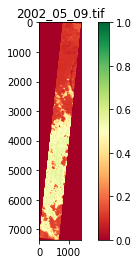

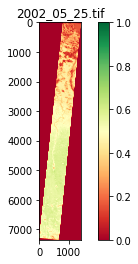

In [10]:
for i in range(50,53):
    vis_tiff(files['prudhoebay'][i], masks['prudhoebay'], vmax=1, vflip=True)

In [11]:
for key, value in masks.items():
    OUT_DIR = Path(f"/datadrive/MODIS_NDVI_Alaska/modis/tiffs_numpy/{key}")
    if not os.path.exists(OUT_DIR):
        os.makedirs(OUT_DIR, exist_ok=True)
    for i, f in enumerate(files[key]):
        print(f"{key} image {i+1} out of {len(files[key])}")
        save_tiff_numpy(OUT_DIR, f, value, vflip=True)    

anwr image 1 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_02_18.tif
anwr image 2 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_03_05.tif
anwr image 3 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_03_21.tif
anwr image 4 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_04_06.tif
anwr image 5 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_04_22.tif
anwr image 6 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_05_08.tif
anwr image 7 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_05_24.tif
anwr image 8 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_06_09.tif
anwr image 9 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_06_25.tif
anwr image 10 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2000_07_11.tif
anwr image 11 out of 494
Filename: /datadrive/MOD

anwr image 87 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2003_11_17.tif
anwr image 88 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2003_12_03.tif
anwr image 89 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2003_12_19.tif
anwr image 90 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_01_01.tif
anwr image 91 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_01_17.tif
anwr image 92 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_02_02.tif
anwr image 93 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_02_18.tif
anwr image 94 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_03_05.tif
anwr image 95 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_03_21.tif
anwr image 96 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2004_04_06.tif
anwr image 97 out of 494
Filename: /data

anwr image 172 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_07_28.tif
anwr image 173 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_08_13.tif
anwr image 174 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_08_29.tif
anwr image 175 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_09_14.tif
anwr image 176 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_09_30.tif
anwr image 177 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_10_16.tif
anwr image 178 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_11_01.tif
anwr image 179 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_11_17.tif
anwr image 180 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_12_03.tif
anwr image 181 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2007_12_19.tif
anwr image 182 out of 494
File

anwr image 257 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_04_07.tif
anwr image 258 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_04_23.tif
anwr image 259 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_05_09.tif
anwr image 260 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_05_25.tif
anwr image 261 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_06_10.tif
anwr image 262 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_06_26.tif
anwr image 263 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_07_12.tif
anwr image 264 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_07_28.tif
anwr image 265 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_08_13.tif
anwr image 266 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2011_08_29.tif
anwr image 267 out of 494
File

anwr image 342 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2014_12_19.tif
anwr image 343 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_01_01.tif
anwr image 344 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_01_17.tif
anwr image 345 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_02_02.tif
anwr image 346 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_02_18.tif
anwr image 347 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_03_06.tif
anwr image 348 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_03_22.tif
anwr image 349 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_04_07.tif
anwr image 350 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_04_23.tif
anwr image 351 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2015_05_09.tif
anwr image 352 out of 494
File

anwr image 427 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_08_29.tif
anwr image 428 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_09_14.tif
anwr image 429 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_09_30.tif
anwr image 430 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_10_16.tif
anwr image 431 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_11_01.tif
anwr image 432 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_11_17.tif
anwr image 433 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_12_03.tif
anwr image 434 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2018_12_19.tif
anwr image 435 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2019_01_01.tif
anwr image 436 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/anwr/2019_01_17.tif
anwr image 437 out of 494
File

ivotuk_north image 16 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_10_15.tif
ivotuk_north image 17 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_10_31.tif
ivotuk_north image 18 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_11_16.tif
ivotuk_north image 19 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_12_02.tif
ivotuk_north image 20 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2000_12_18.tif
ivotuk_north image 21 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2001_01_01.tif
ivotuk_north image 22 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2001_01_17.tif
ivotuk_north image 23 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2001_02_02.tif
ivotuk_north image 24 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2001_02

ivotuk_north image 90 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_01_01.tif
ivotuk_north image 91 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_01_17.tif
ivotuk_north image 92 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_02_02.tif
ivotuk_north image 93 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_02_18.tif
ivotuk_north image 94 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_03_05.tif
ivotuk_north image 95 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_03_21.tif
ivotuk_north image 96 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_04_06.tif
ivotuk_north image 97 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_04_22.tif
ivotuk_north image 98 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2004_05

ivotuk_north image 163 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_03_06.tif
ivotuk_north image 164 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_03_22.tif
ivotuk_north image 165 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_04_07.tif
ivotuk_north image 166 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_04_23.tif
ivotuk_north image 167 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_05_09.tif
ivotuk_north image 168 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_05_25.tif
ivotuk_north image 169 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_06_10.tif
ivotuk_north image 170 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2007_06_26.tif
ivotuk_north image 171 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_nort

ivotuk_north image 236 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_05_09.tif
ivotuk_north image 237 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_05_25.tif
ivotuk_north image 238 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_06_10.tif
ivotuk_north image 239 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_06_26.tif
ivotuk_north image 240 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_07_12.tif
ivotuk_north image 241 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_07_28.tif
ivotuk_north image 242 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_08_13.tif
ivotuk_north image 243 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2010_08_29.tif
ivotuk_north image 244 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_nort

ivotuk_north image 309 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_07_12.tif
ivotuk_north image 310 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_07_28.tif
ivotuk_north image 311 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_08_13.tif
ivotuk_north image 312 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_08_29.tif
ivotuk_north image 313 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_09_14.tif
ivotuk_north image 314 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_09_30.tif
ivotuk_north image 315 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_10_16.tif
ivotuk_north image 316 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2013_11_01.tif
ivotuk_north image 317 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_nort

ivotuk_north image 382 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_09_13.tif
ivotuk_north image 383 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_09_29.tif
ivotuk_north image 384 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_10_15.tif
ivotuk_north image 385 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_10_31.tif
ivotuk_north image 386 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_11_16.tif
ivotuk_north image 387 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_12_02.tif
ivotuk_north image 388 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2016_12_18.tif
ivotuk_north image 389 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2017_01_01.tif
ivotuk_north image 390 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_nort

ivotuk_north image 455 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2019_11_17.tif
ivotuk_north image 456 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2019_12_03.tif
ivotuk_north image 457 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2019_12_19.tif
ivotuk_north image 458 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2020_01_01.tif
ivotuk_north image 459 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2020_01_17.tif
ivotuk_north image 460 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2020_02_02.tif
ivotuk_north image 461 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2020_02_18.tif
ivotuk_north image 462 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_north/2020_03_05.tif
ivotuk_north image 463 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_nort

ivotuk_south image 34 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_07_28.tif
ivotuk_south image 35 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_08_13.tif
ivotuk_south image 36 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_08_29.tif
ivotuk_south image 37 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_09_14.tif
ivotuk_south image 38 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_09_30.tif
ivotuk_south image 39 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_10_16.tif
ivotuk_south image 40 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_11_01.tif
ivotuk_south image 41 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_11_17.tif
ivotuk_south image 42 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2001_12

ivotuk_south image 108 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2004_10_15.tif
ivotuk_south image 109 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2004_10_31.tif
ivotuk_south image 110 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2004_11_16.tif
ivotuk_south image 111 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2004_12_02.tif
ivotuk_south image 112 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2004_12_18.tif
ivotuk_south image 113 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2005_01_01.tif
ivotuk_south image 114 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2005_01_17.tif
ivotuk_south image 115 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2005_02_02.tif
ivotuk_south image 116 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

ivotuk_south image 181 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2007_12_19.tif
ivotuk_south image 182 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_01_01.tif
ivotuk_south image 183 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_01_17.tif
ivotuk_south image 184 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_02_02.tif
ivotuk_south image 185 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_02_18.tif
ivotuk_south image 186 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_03_05.tif
ivotuk_south image 187 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_03_21.tif
ivotuk_south image 188 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2008_04_06.tif
ivotuk_south image 189 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

ivotuk_south image 254 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_02_18.tif
ivotuk_south image 255 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_03_06.tif
ivotuk_south image 256 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_03_22.tif
ivotuk_south image 257 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_04_07.tif
ivotuk_south image 258 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_04_23.tif
ivotuk_south image 259 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_05_09.tif
ivotuk_south image 260 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_05_25.tif
ivotuk_south image 261 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2011_06_10.tif
ivotuk_south image 262 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

ivotuk_south image 327 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_04_23.tif
ivotuk_south image 328 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_05_09.tif
ivotuk_south image 329 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_05_25.tif
ivotuk_south image 330 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_06_10.tif
ivotuk_south image 331 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_06_26.tif
ivotuk_south image 332 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_07_12.tif
ivotuk_south image 333 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_07_28.tif
ivotuk_south image 334 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2014_08_13.tif
ivotuk_south image 335 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

ivotuk_south image 400 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_06_26.tif
ivotuk_south image 401 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_07_12.tif
ivotuk_south image 402 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_07_28.tif
ivotuk_south image 403 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_08_13.tif
ivotuk_south image 404 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_08_29.tif
ivotuk_south image 405 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_09_14.tif
ivotuk_south image 406 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_09_30.tif
ivotuk_south image 407 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2017_10_16.tif
ivotuk_south image 408 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

ivotuk_south image 473 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_08_28.tif
ivotuk_south image 474 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_09_13.tif
ivotuk_south image 475 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_09_29.tif
ivotuk_south image 476 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_10_15.tif
ivotuk_south image 477 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_10_31.tif
ivotuk_south image 478 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_11_16.tif
ivotuk_south image 479 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_12_02.tif
ivotuk_south image 480 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_south/2020_12_18.tif
ivotuk_south image 481 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/ivotuk_sout

prudhoebay image 54 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_06_10.tif
prudhoebay image 55 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_06_26.tif
prudhoebay image 56 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_07_12.tif
prudhoebay image 57 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_07_28.tif
prudhoebay image 58 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_08_13.tif
prudhoebay image 59 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_08_29.tif
prudhoebay image 60 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_09_14.tif
prudhoebay image 61 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_09_30.tif
prudhoebay image 62 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2002_10_16.tif
prudhoebay image 63 out of 4

prudhoebay image 130 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_09_30.tif
prudhoebay image 131 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_10_16.tif
prudhoebay image 132 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_11_01.tif
prudhoebay image 133 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_11_17.tif
prudhoebay image 134 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_12_03.tif
prudhoebay image 135 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2005_12_19.tif
prudhoebay image 136 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2006_01_01.tif
prudhoebay image 137 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2006_01_17.tif
prudhoebay image 138 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2006_02_02.tif
prudhoebay image 13

prudhoebay image 206 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_01_17.tif
prudhoebay image 207 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_02_02.tif
prudhoebay image 208 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_02_18.tif
prudhoebay image 209 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_03_06.tif
prudhoebay image 210 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_03_22.tif
prudhoebay image 211 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_04_07.tif
prudhoebay image 212 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_04_23.tif
prudhoebay image 213 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_05_09.tif
prudhoebay image 214 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2009_05_25.tif
prudhoebay image 21

prudhoebay image 282 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_05_08.tif
prudhoebay image 283 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_05_24.tif
prudhoebay image 284 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_06_09.tif
prudhoebay image 285 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_06_25.tif
prudhoebay image 286 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_07_11.tif
prudhoebay image 287 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_07_27.tif
prudhoebay image 288 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_08_12.tif
prudhoebay image 289 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_08_28.tif
prudhoebay image 290 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2012_09_13.tif
prudhoebay image 29

prudhoebay image 358 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_08_29.tif
prudhoebay image 359 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_09_14.tif
prudhoebay image 360 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_09_30.tif
prudhoebay image 361 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_10_16.tif
prudhoebay image 362 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_11_01.tif
prudhoebay image 363 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_11_17.tif
prudhoebay image 364 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_12_03.tif
prudhoebay image 365 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2015_12_19.tif
prudhoebay image 366 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2016_01_01.tif
prudhoebay image 36

prudhoebay image 434 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2018_12_19.tif
prudhoebay image 435 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_01_01.tif
prudhoebay image 436 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_01_17.tif
prudhoebay image 437 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_02_02.tif
prudhoebay image 438 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_02_18.tif
prudhoebay image 439 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_03_06.tif
prudhoebay image 440 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_03_22.tif
prudhoebay image 441 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_04_07.tif
prudhoebay image 442 out of 494
Filename: /datadrive/MODIS_NDVI_Alaska/modis/tiffs/prudhoebay/2019_04_23.tif
prudhoebay image 44